Since the EEGdata.csv file used for this overview has 18,363 samples at a sampling rate of 250Hz, the total ammount of time for this data took 18,363×0.004seconds=73.452seconds


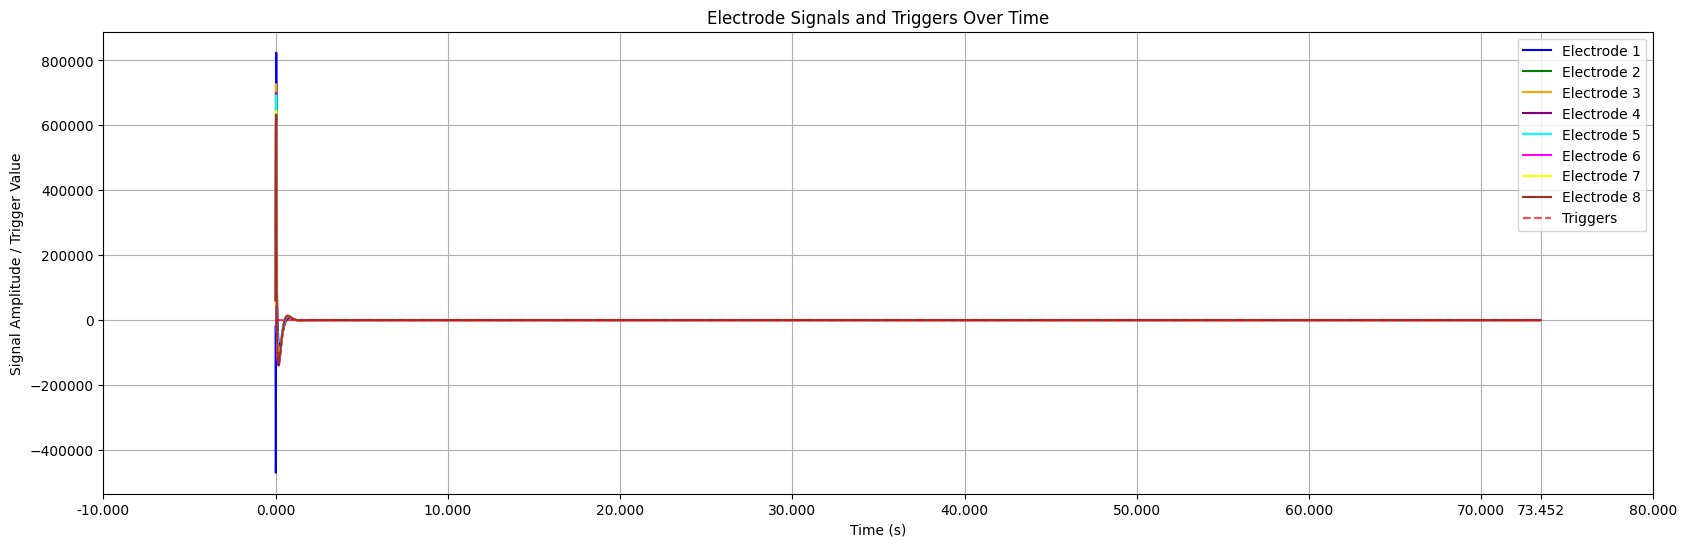

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
eeg_data = pd.read_csv('EEGdata.csv', header=None)

# Define the sampling rate (250 Hz)
sampling_rate = 250  # Hz
time_increment = 1 / sampling_rate  # seconds per sample

# Add a "Time" column
eeg_data['Time'] = eeg_data.index * time_increment

# Define colors for each electrode
electrode_colors = [
    'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown'
]

# Create a single figure to plot all 8 electrodes and triggers
plt.figure(figsize=(20, 6))

# Loop through electrode columns (0 to 7)
for i in range(8):  # Assuming electrode data is in columns 0 to 7
    plt.plot(
        eeg_data['Time'], 
        eeg_data.iloc[:, i], 
        label=f'Electrode {i + 1}', 
        color=electrode_colors[i]
    )

# Plot the triggers (assume triggers are in column 8) using "Time" as the x-axis
plt.plot(
    eeg_data['Time'], 
    eeg_data.iloc[:, 8], 
    label='Triggers', 
    color='red', 
    linestyle='--', 
    alpha=0.7
)

# Set x-axis ticks, including the last time value
plt.xticks(
    ticks=list(plt.xticks()[0]) + [eeg_data['Time'].iloc[-1]],
    labels=[f'{tick:.3f}' if tick != eeg_data['Time'].iloc[-1] else f'{eeg_data["Time"].iloc[-1]:.3f}' for tick in list(plt.xticks()[0]) + [eeg_data['Time'].iloc[-1]]]
)

# Add labels, title, and legend
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude / Trigger Value')
plt.title('Electrode Signals and Triggers Over Time')
plt.legend()
plt.grid()

# Save DataFrame to CSV
eeg_data.to_csv('EEGdata_in_time.csv', index=False, header=True)

# Show the plot
plt.show()
